In [441]:
import sys

sys.path.append("...")

import Essentials

In [442]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import pandas as pd

In [443]:
data_archive = np.load('Data_First_newest.npz', allow_pickle=True)

In [444]:
def prepare_Y(y):
    timestamp = y[:, 1]   
    y = y[:, 0].reshape(len(y), 1)
    y = y.astype(np.float64)

    return y, timestamp

In [445]:
all_X_1 = data_archive['all_X_1']
all_Y_1 = data_archive['all_Y_1']

all_X_2 = data_archive['all_X_2']
all_Y_2 = data_archive['all_Y_2']

all_X_3 = data_archive['all_X_3']
all_Y_3 = data_archive['all_Y_3']

In [446]:
df_X1 = pd.read_csv(r'raw_X1.csv', index_col=0)
df_X2 = pd.read_csv(r'raw_X2.csv', index_col=0)
df_X3 = pd.read_csv(r'raw_X3.csv', index_col=0)
df_Y1 = pd.read_csv(r'raw_Y1.csv', index_col=0)
df_Y2 = pd.read_csv(r'raw_Y1.csv', index_col=0)
df_Y3 = pd.read_csv(r'raw_Y1.csv', index_col=0)

In [447]:
x_train, x_test, y_train, y_test = train_test_split(all_X_1, all_Y_1, test_size=0.25, random_state=42)

In [448]:
y_train, timestamp_train = prepare_Y(y_train)

In [449]:
y_test, timestamp_test = prepare_Y(y_test)

In [450]:
all_X_1.shape
all_Y_1.shape
x_train.shape
y_test.shape

(33, 1)

In [451]:
column_names_X1 = df_X1.columns.tolist()
column_names_X2 = df_X2.columns.tolist()
column_names_X3 = df_X3.columns.tolist()
column_name_Y1 = 'Давление насыщенных паров в зимний период'
column_name_Y2 = 'Конец кипения легкого бензина'
column_name_Y3 = 'Содержание олефинов в продукте'

In [452]:
column_names_X1.pop()
column_names_X2.pop()
column_names_X3.pop()

'DateTime'

In [453]:
feature_names_1 = column_names_X1
feature_names_2 = column_names_X2
feature_names_3 = column_names_X3

In [454]:
target_name_1 = column_name_Y1
target_name_2 = column_name_Y2
target_name_3 = column_name_Y3

In [455]:
class svm(Essentials.SoftSensor):
    def __init__(self, x_train, y_train, **kwargs):
        super().__init__('Test')
        self.parameters = kwargs
        self.model = SVR(**self.parameters)
        self.x_scaler = StandardScaler() 
        self.y_scaler = StandardScaler()
        self.x_scaler.fit(x_train)
        self.y_scaler.fit(y_train)
        self.train(x_train, y_train)

    def preprocessing(self, x):
        try:
            return self.x_scaler.transform(x)
        except:
            try:
               return self.y_scaler.transform(x)
            except BaseException as err:
                print("Ошибка скейлера")
                raise err
    def postprocessing(self, x):
        return x
                
    def evaluate_model(self, x):
        predictions = self.get_model().predict(x)
        return predictions.reshape(-1, 1)

    def train(self, x_train, y_train):
        x_train = self.preprocessing(x_train)
        self.model.fit(x_train, y_train)
        self.set_model(self.model)
        
    def equation(self, feature_names, target_name):
        weights = self.model.coef_[0]
        intercept = self.model.intercept_[0]
        equation = f"{target_name} = {intercept:.2f}"
        for i, feature_name in enumerate(feature_names):
            equation += f" + {weights[i]:.2f} * {feature_name}"
        return equation        
    def __str__(self):
        pass

In [456]:
test_soft_sensor = svm(x_train, y_train, kernel='linear', C=0.2, epsilon=0.5)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [457]:
print(test_soft_sensor.equation(feature_names_2, target_name_2))

Конец кипения легкого бензина = 57.17 + -0.13 * Расход бензина ККР на установку + -0.20 * Расход нафты ККР на установку + -0.14 * Расход бензина на рециркуляцию от Е-1205 + 0.35 * Температура бензина ККР на установку + 0.11 * Расход сырья после Р-1101 + -0.08 * Показатель соотношения водород к углероду + 0.08 * Расход водорода на смешение перед Е-1101 + 0.13 * Температура сырья перед Е-1101 + -0.02 * Давление сырья перед Е-1101 + 0.06 * Температура сырья после Е-1103 + 0.13 * Температура бензина перед Е-1102 + -0.14 * Давление бензина после Е-1102 + 0.22 * Давление на входе в R-1101 + 0.21 * Температура на входе в R-1101 + -0.03 * Перепад давления реактора R-1101 + 0.13 * Температура на входе в С-1101 + 0.19 * Давление верха С-1101 + 0.20 * Температура 2-ой тарелки С-1101 + -0.16 * Расход ЛБ от С-1101 + 0.02 * Температура ЛБ от С-1101 + 0.38 * Температура 9-ой тарелки С-1101 + 0.14 * Температура куба С-1101 + 0.21 * Уровень куба С-1101 + -0.02 * Расход ТБ с куба С-1101 + -0.50 * Расход

In [458]:
metric = Essentials.R2Metric()

In [459]:
test_soft_sensor.test(x_test, y_test, metric)

(array([[54.55561676],
        [56.71651924],
        [55.98668786],
        [58.05004512],
        [59.306327  ],
        [55.2070396 ],
        [59.64774762],
        [48.85510904],
        [60.14276442],
        [60.63641056],
        [54.0965897 ],
        [58.61628186],
        [59.18715621],
        [53.60895969],
        [51.81289636],
        [52.23969179],
        [60.35791198],
        [61.83246627],
        [55.34285111],
        [59.09352234],
        [59.09687415],
        [54.32373568],
        [58.40119747],
        [57.39893791],
        [59.24676962],
        [60.51567464],
        [59.87906043],
        [58.11960001],
        [60.99647123],
        [52.1387226 ],
        [59.0102808 ],
        [59.8779078 ],
        [60.07378443]]),
 0.815211140023418)

In [460]:
test_visual = Essentials.Visualizer(x_test, y_test, timestamp_test, [metric], 'Support Vector Model SoftSensor R2 metric on Test')

      Coefficient of determination
Test                      0.815211


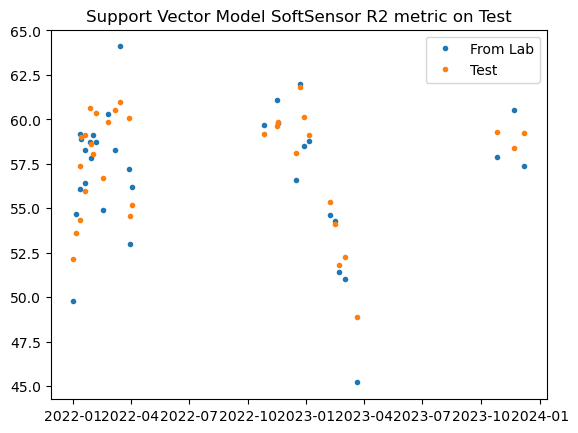

In [461]:
test_visual.visualize([test_soft_sensor])

In [462]:
test_visual = Essentials.Visualizer(x_train, y_train, timestamp_train, [metric], 'Support Vector Model SoftSensor R2 metric on Train')

      Coefficient of determination
Test                      0.890655


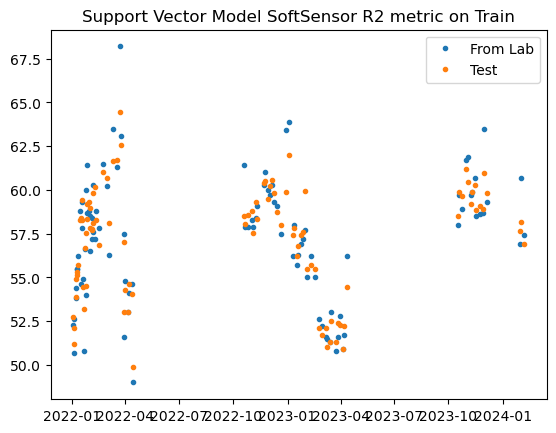

In [463]:
test_visual.visualize([test_soft_sensor])